In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('KBY_grid_1input_03-Nov-2022 19:10:44_session_data.csv')
df.head()

,Trial,Subject_Time,Cue_Pos,Target_Pos
0,Valid-300,0.26626,"0,8","0,8"
1,Invalid-300,0.30476,"4,0","8,0"
2,Invalid-300,0.24846,"12,4","4,8"
3,Valid-100,0.42758,"8,0","8,0"
4,Valid-300,0.28068,"0,12","0,12"


In [9]:
len(df)

1280

In [10]:
trial_types = [ df['Trial'][i].split('-')[0] for i in range(len(df)) ]
trial_pings = [ int(df['Trial'][i].split('-')[1]) for i in range(len(df)) ]

df['Trial_Type'] = trial_types
df['Trial_Ping'] = trial_pings

df.head()

,Trial,Subject_Time,Cue_Pos,Target_Pos,Trial_Type,Trial_Pings
0,Valid-300,0.26626,"0,8","0,8",Valid,300
1,Invalid-300,0.30476,"4,0","8,0",Invalid,300
2,Invalid-300,0.24846,"12,4","4,8",Invalid,300
3,Valid-100,0.42758,"8,0","8,0",Valid,100
4,Valid-300,0.28068,"0,12","0,12",Valid,300


In [12]:
euc_dists = [ 
    np.sqrt((int(df['Cue_Pos'][i].split(',')[0]) - int(df['Target_Pos'][i].split(',')[0]))**2 + \
            (int(df['Cue_Pos'][i].split(',')[1]) - int(df['Target_Pos'][i].split(',')[1]))**2) \
    for i in range(len(df))
]

df['Euc_Distance'] = euc_dists

df.head()

,Trial,Subject_Time,Cue_Pos,Target_Pos,Trial_Type,Trial_Pings,Euc_Distance
0,Valid-300,0.26626,"0,8","0,8",Valid,300,0.000000
1,Invalid-300,0.30476,"4,0","8,0",Invalid,300,4.000000
2,Invalid-300,0.24846,"12,4","4,8",Invalid,300,8.944272
3,Valid-100,0.42758,"8,0","8,0",Valid,100,0.000000
4,Valid-300,0.28068,"0,12","0,12",Valid,300,0.000000


In [27]:
alignments = []
for i in range(len(df)):
    if df['Trial_Type'][i] == 'Invalid' and \
        df['Cue_Pos'][i].split(',')[0] == df['Target_Pos'][i].split(',')[0]:
        alignments.append('Vertical')
    elif df['Trial_Type'][i] == 'Invalid' and \
        df['Cue_Pos'][i].split(',')[1] == df['Target_Pos'][i].split(',')[1]:
        alignments.append('Horizontal')
    elif df['Trial_Type'][i] == 'Valid':
        alignments.append('Valid')
    else:
        alignments.append('Diagonal')
df['Alignment'] = alignments
df.head()

,Trial,Subject_Time,Cue_Pos,Target_Pos,Trial_Type,Trial_Pings,Euc_Distance,Alignment
0,Valid-300,0.26626,"0,8","0,8",Valid,300,0.000000,Valid
1,Invalid-300,0.30476,"4,0","8,0",Invalid,300,4.000000,Horizontal
2,Invalid-300,0.24846,"12,4","4,8",Invalid,300,8.944272,Diagonal
3,Valid-100,0.42758,"8,0","8,0",Valid,100,0.000000,Valid
4,Valid-300,0.28068,"0,12","0,12",Valid,300,0.000000,Valid


# Plots

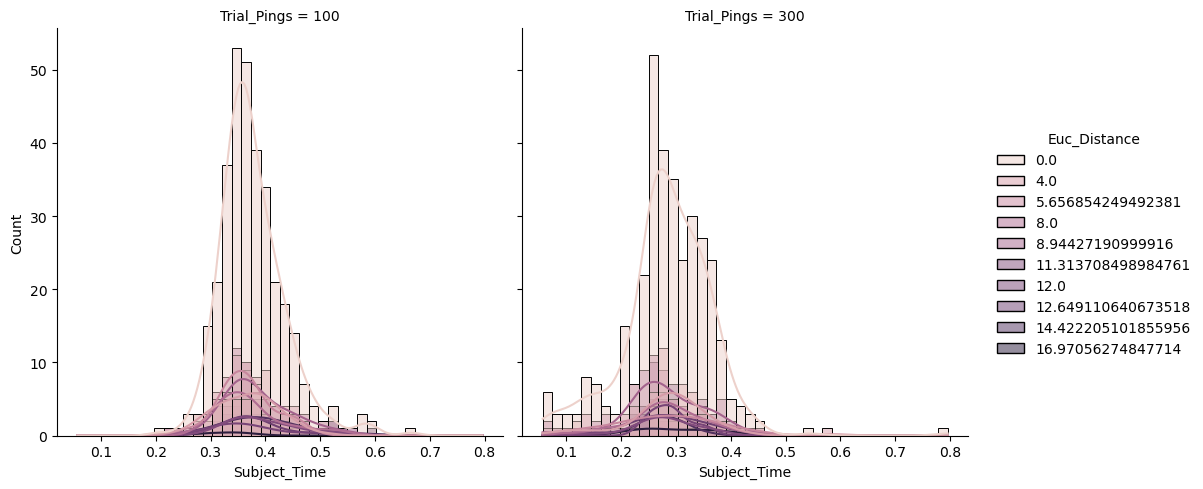

In [28]:
sns.displot(data=df, x='Subject_Time', hue='Euc_Distance', col='Trial_Pings', kde=True)
plt.show()

In [119]:
def t_test(data):
    """
    For comparing 2 groups against each other to prove a significant difference
    """
    X1 = data[data.index == 0]
    X2 = data[data.index == 1]
    
    t = (data['Mean'][0] - data['Mean'][1]) / \
        np.sqrt( data['Std'][0]**2/data['Sample_Size'][0] + data['Std'][1]**2/data['Sample_Size'][1] )
    return t

In [44]:
dists = np.random.uniform(0, 22.63, 640)

df = pd.DataFrame()
v_dists, h_dists = [], []
angles = np.random.uniform(0, np.pi*2, 1280)
for i, dist in enumerate(dists):
    v_dists.append(abs(dist*np.sin(angles[i])))
    h_dists.append(abs(dist*np.cos(angles[i])))
df['dists'] = dists
df['v_dists'] = v_dists
df['h_dists'] = h_dists
df['type'] = ['invalid']*640

v_df = pd.DataFrame()
v_df['dists'] = np.zeros(640)
v_df['v_dists'] = np.zeros(640)
v_df['h_dists'] = np.zeros(640)
v_df['type'] = ['valid']*640

df = pd.concat([df, v_df], ignore_index=True)

df['delay'] = [np.random.choice([100, 300]) for _ in range(1280)]

df.head()

,dists,v_dists,h_dists,type,delay
0,9.417927,7.725442,5.386548,invalid,100
1,19.388893,16.175661,10.690050,invalid,100
2,16.072111,11.415057,11.314116,invalid,100
3,20.063501,14.620842,13.739544,invalid,300
4,5.144423,3.754356,3.517087,invalid,100


In [99]:
times = []
for i in range(1280):
    base_value = np.random.normal(0.325, 0.025)
    if df['type'][i] == 'invalid': base_value += df['dists'][i]*10**(-2)
    if df['delay'][i] == 100: base_value += np.random.normal(0.25, 0.0333)
    elif df['delay'][i] == 300: base_value += np.random.normal(0.15, 0.0333)
        
    times.append(base_value)
df['times'] = times
df.head()

,dists,v_dists,h_dists,type,delay,times
0,9.417927,7.725442,5.386548,invalid,100,0.733044
1,19.388893,16.175661,10.690050,invalid,100,0.771910
2,16.072111,11.415057,11.314116,invalid,100,0.798011
3,20.063501,14.620842,13.739544,invalid,300,0.651989
4,5.144423,3.754356,3.517087,invalid,100,0.561206


In [193]:
df['larger_bins'] = pd.cut(df['dists'], 6)
df.head()

,dists,v_dists,h_dists,type,delay,times,bins,v_larger_bins,h_larger_bins,larger_bins
0,9.417927,7.725442,5.386548,invalid,100,0.733044,9,"(7.413, 11.119]","(3.733, 7.465]","(7.539, 11.308]"
1,19.388893,16.175661,10.690050,invalid,100,0.771910,19,"(14.826, 18.532]","(7.465, 11.198]","(18.847, 22.617]"
2,16.072111,11.415057,11.314116,invalid,100,0.798011,16,"(11.119, 14.826]","(11.198, 14.931]","(15.078, 18.847]"
3,20.063501,14.620842,13.739544,invalid,300,0.651989,20,"(11.119, 14.826]","(11.198, 14.931]","(18.847, 22.617]"
4,5.144423,3.754356,3.517087,invalid,100,0.561206,5,"(3.706, 7.413]","(-0.0224, 3.733]","(3.769, 7.539]"


In [173]:
df['v_larger_bins'] = pd.cut(df['v_dists'], 6)
df['h_larger_bins'] = pd.cut(df['h_dists'], 6)
df.head()

,dists,v_dists,h_dists,type,delay,times,bins,larger_bins,v_larger_bins,h_larger_bins
0,9.417927,7.725442,5.386548,invalid,100,0.733044,9,"(7.539, 11.308]","(7.413, 11.119]","(3.733, 7.465]"
1,19.388893,16.175661,10.690050,invalid,100,0.771910,19,"(18.847, 22.617]","(14.826, 18.532]","(7.465, 11.198]"
2,16.072111,11.415057,11.314116,invalid,100,0.798011,16,"(15.078, 18.847]","(11.119, 14.826]","(11.198, 14.931]"
3,20.063501,14.620842,13.739544,invalid,300,0.651989,20,"(18.847, 22.617]","(11.119, 14.826]","(11.198, 14.931]"
4,5.144423,3.754356,3.517087,invalid,100,0.561206,5,"(3.769, 7.539]","(3.706, 7.413]","(-0.0224, 3.733]"


In [192]:
df.drop('larger_bins', axis = 1, inplace = True)

Text(0.5, 9.444444444444438, 'Distance (in cm)')

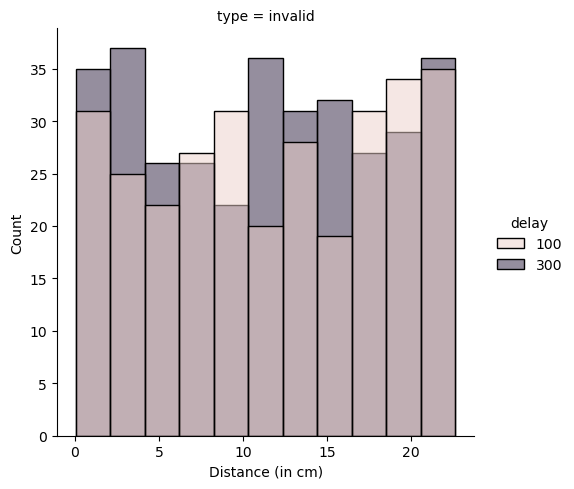

In [139]:
sns.displot(df[df.type == 'invalid'], x = 'dists', hue = 'delay', col = 'type')
plt.xlabel('Distance (in cm)')

In [124]:
summ_table = pd.DataFrame()
g1 = df[df.type == 'invalid']
g2 = df[df.type == 'valid']

ns = [640, 640]
means = [g1.times.mean(), g2.times.mean()]
stds = [g1.times.std(), g2.times.std()]

summ_table['Group'] = ['invalid', 'valid']
summ_table['Sample_Size'] = ns
summ_table['Mean'] = means
summ_table['Std'] = stds

t_test(summ_table)

25.04726139152009

In [125]:
summ_table = pd.DataFrame()
g1 = df[df.delay == 100]
g2 = df[df.delay == 300]

ns = [640, 640]
means = [g1.times.mean(), g2.times.mean()]
stds = [g1.times.std(), g2.times.std()]

summ_table['Group'] = [100, 300]
summ_table['Sample_Size'] = [len(g1), len(g2)]
summ_table['Mean'] = means
summ_table['Std'] = stds

t_test(summ_table)

20.994429005779885

In [127]:
df.to_csv('KBY_nogrid_1input_10-Nov-2022 13:22:47_session_data.csv')

In [140]:
df.columns

Index(['dists', 'v_dists', 'h_dists', 'type', 'delay', 'times', 'bins',
       'larger_bins'],
      dtype='object')

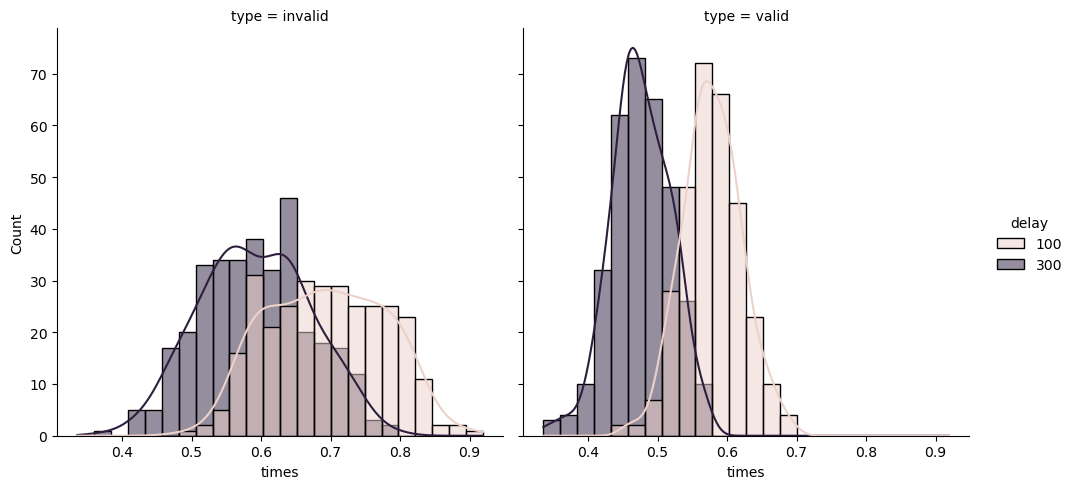

In [153]:
sns.displot(df, x = 'times', hue = 'delay', col = 'type', kde = True)

Text(0.5, 0, 'Distance (cm)')

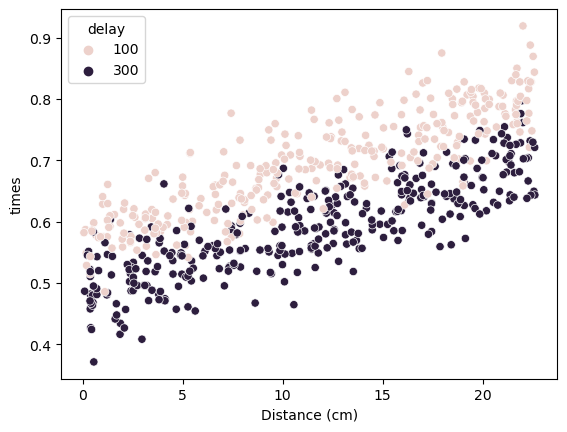

In [151]:
sns.scatterplot(data=df[df.type == 'invalid'], x="dists", y="times", hue = 'delay')
plt.xlabel('Distance (cm)')

<AxesSubplot:xlabel='times', ylabel='type'>

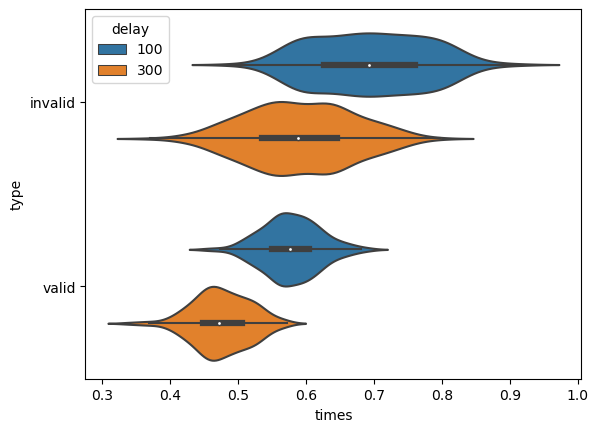

In [160]:
sns.violinplot(data = df, x = 'times', y = 'type', hue = 'delay')

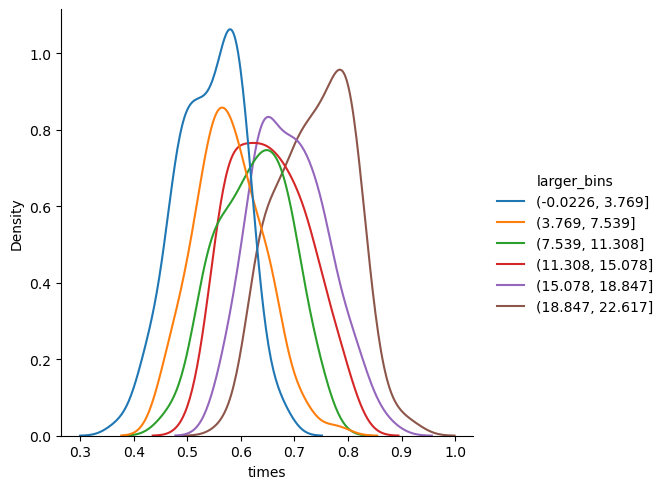

In [201]:
sns.displot(df[df.type == 'invalid'], x = 'times', hue = 'larger_bins', kind = 'kde')

Text(463.154761904762, 0.5, 'Time (s)')

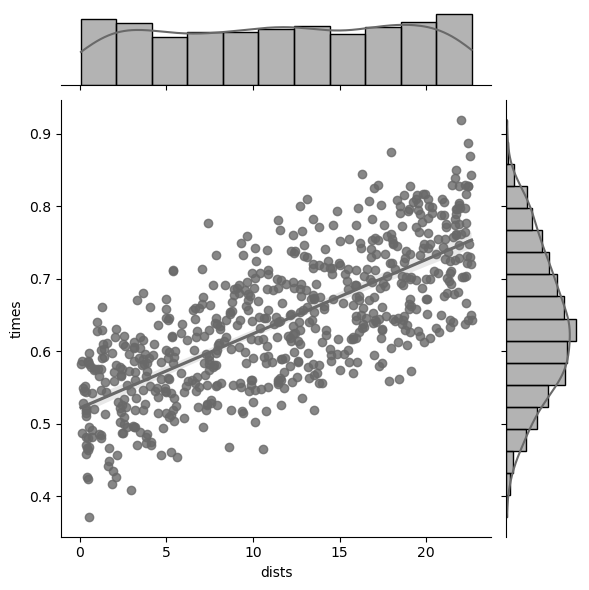

In [216]:
sns.jointplot(data = df[df.type == 'invalid'], x = "dists", y = "times", kind = 'reg', color = "dimgray")
plt.xlabel('Distance (cm)')
plt.ylabel('Time (s)')

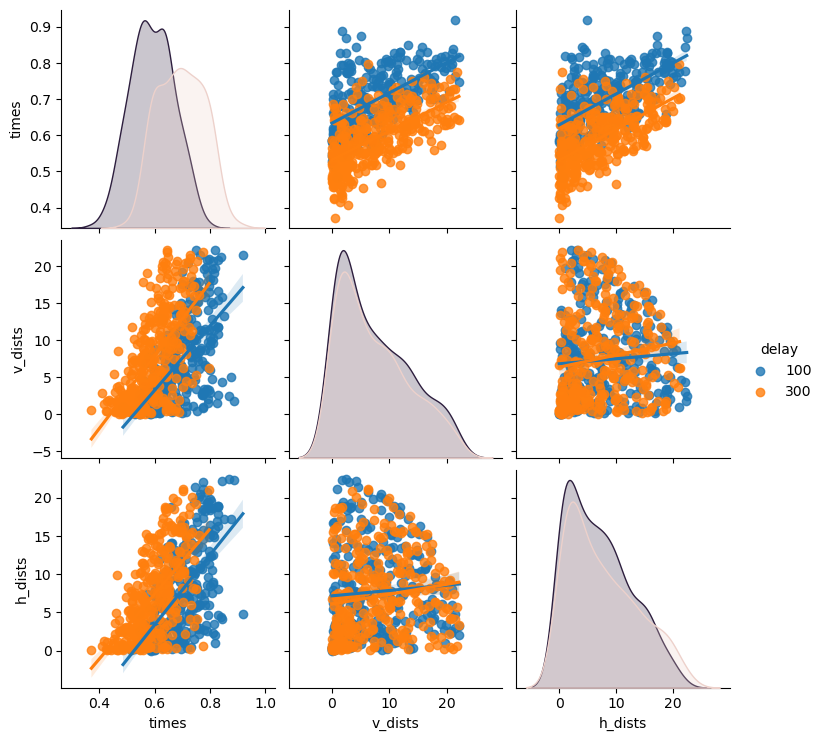

In [226]:
sns.pairplot(df[df.type == 'invalid'], vars = ["times", 'v_dists', 'h_dists'], kind = "reg", hue = 'delay')

In [238]:
(df[df.type == 'invalid'].dists.to_numpy() / df[df.type == 'invalid'].times.to_numpy()).mean()

17.25834754930934

In [239]:
means = []
for b in range(23):
    temp1 = df[df.type == 'invalid']
    temp = temp1[temp1.bins == b]
    means.append((temp.dists.to_numpy() / temp.times.to_numpy()).mean())

In [242]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [244]:
model = ols('times ~ C(type) + C(delay) + C(type):C(delay) + C(dists)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(type),4.227368,1.0,2367.540404,6.784002e-217
C(delay),3.285679,1.0,1840.147108,3.758537e-190
C(dists),77.691577,640.0,67.986287,0.000000e+00
C(type):C(delay),0.000551,1.0,0.308316,5.789098e-01
Residual,1.139183,638.0,NaN,NaN
